In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import binotools as bt

from astropy import units as u
import astropy.io.fits as fits
import scipy

import os, datetime
import glob

plt.style.use('seaborn-talk')

# Apply flux calibration to all spectra

true flux = calib * pipeline output

In [6]:
datadir = os.environ['BINO_DIR']+'2649_BLAS_1/reduced_data/2019.0423_red_seeing1.2_6.25hrs_fluxcalib/'

transmission_file = glob.glob(datadir+'*transmission.txt')[0]
transmission      = np.genfromtxt(transmission_file, names=True)
print(transmission.dtype)

[('wave_nm', '<f8'), ('transmission', '<f8')]


## Non sky-sub data

In [42]:
# Find spectra
obj_files = sorted(set(glob.glob(datadir+'obj_abs*.fits')) - set(glob.glob(datadir+'obj_abs*_fluxcalib.fits')))
print(obj_files)

# find flux calib file
flux_calib_file = glob.glob(datadir+'*fluxcalibration_polyfit.txt')[0]
flux_calib      = np.genfromtxt(flux_calib_file, names=True)

['/h/hobnob0/Binospec/2649_BLAS_1/reduced_data/2019.0423_red_seeing1.2_6.25hrs_fluxcalib/obj_abs_err_slits_lin.fits', '/h/hobnob0/Binospec/2649_BLAS_1/reduced_data/2019.0423_red_seeing1.2_6.25hrs_fluxcalib/obj_abs_slits_extr.fits', '/h/hobnob0/Binospec/2649_BLAS_1/reduced_data/2019.0423_red_seeing1.2_6.25hrs_fluxcalib/obj_abs_slits_lin.fits']


In [8]:
# Do flux calib
for obj_file in obj_files:
    bt.flux_calib_specfile(obj_file, flux_calib_file)

Processing obj_abs_err_slits_lin.fits
Written flux calib file to /h/hobnob0/Binospec/2649_BLAS_1/reduced_data/2019.0423_red_seeing1.2_6.25hrs_fluxcalib/obj_abs_err_slits_lin_fluxcalib.fits
Processing obj_abs_slits_extr.fits
Written flux calib file to /h/hobnob0/Binospec/2649_BLAS_1/reduced_data/2019.0423_red_seeing1.2_6.25hrs_fluxcalib/obj_abs_slits_extr_fluxcalib.fits
Processing obj_abs_slits_lin.fits
Written flux calib file to /h/hobnob0/Binospec/2649_BLAS_1/reduced_data/2019.0423_red_seeing1.2_6.25hrs_fluxcalib/obj_abs_slits_lin_fluxcalib.fits


/home/cmason/anaconda2/envs/astroconda3/lib/python3.7/site-packages/Binotools-0.1.0-py3.7.egg/binotools/bino_plot.py:136: RuntimeWarning: invalid value encountered in greater
  imcentered[:,np.where(noise > 1.*np.nanmedian(noise))] = np.nan


-0.06998685986103781


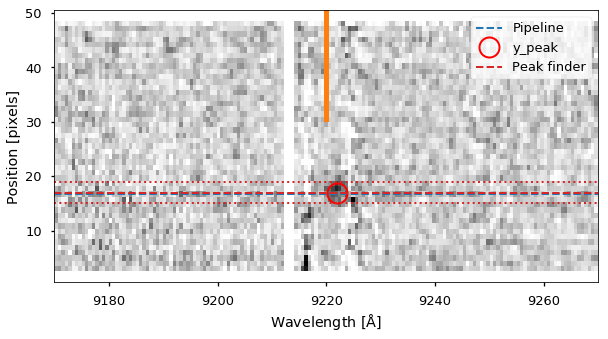

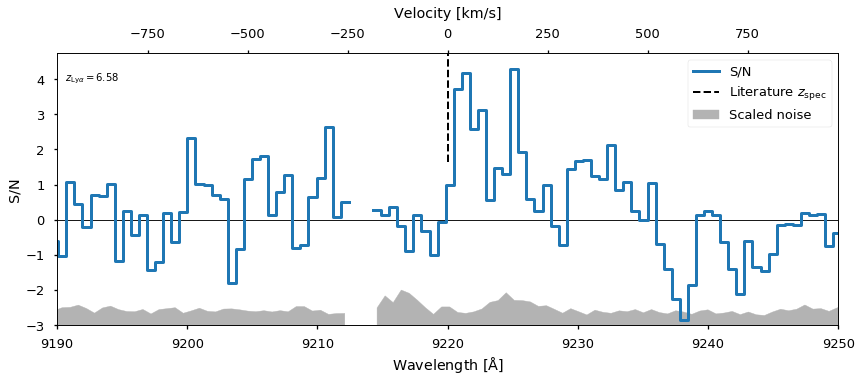

In [16]:
# Plot
obj_files = sorted(set(glob.glob(datadir+'obj*fluxcalib.fits')))

bino_plot_fluxcalib = bt.BinoPlotter(obj_files[-1], 
                                     transmission=transmission['transmission'])

# Line to center on
Lya_wave   = 9220. # Wavelength to center on
posy_width = 1.*4. # Pixel width of extraction window for 1D spectrum (4 pix = PSF from stars ~1")
wave_limA  = 30.   # Wavelength range to plot over (Lya_wave /pm wave_limA)

targetid = 144 #50      # slit number ( mask id + 1)

image, ypos = bino_plot_fluxcalib.spec2D(target=targetid, wave_lineA=Lya_wave, posy_width=posy_width,
                               vmin_sig=-0.3, vmax_sig=0.7, wave_limA=50., posy=None,
                               smooth=None)

bino_plot_fluxcalib.spec1D(image, wave_lineA=Lya_wave, fit=False,
                 posy_med=ypos, posy_width=posy_width, wave_limA=wave_limA,
                 StoN=True, flux_unit='erg cm$^{-2}$ s$^{-1}$ $\mathrm{\AA}^{-1}$')

print(np.nanmedian(image))



## Sky sub data

In [8]:
# Find spectra
print(datadir)
obj_files_skysub = sorted(set(glob.glob(datadir+'obj-sky_slits*.fits')) - set(glob.glob(datadir+'obj-sky_slits*_fluxcalib.fits')))
print(obj_files_skysub)

# find flux calib file
flux_calib_file = glob.glob(datadir+'*fluxcalibration_polyfit_skysub.txt')[0]
flux_calib      = np.genfromtxt(flux_calib_file, names=True)

/h/hobnob0/Binospec/2649_BLAS_1/reduced_data/2019.0423_red_seeing1.2_6.25hrs_fluxcalib/
[]


In [26]:
# Do flux calib
for obj_file in obj_files_skysub:
    bt.flux_calib_specfile(obj_file, flux_calib_file)

Processing obj-sky_slits_extr.fits...
    Written flux calib file to /h/hobnob0/Binospec/2649_BLAS_1/reduced_data/2019.0423_red_seeing1.2_6.25hrs_fluxcalib/obj-sky_slits_extr_fluxcalib.fits
Processing obj-sky_slits_lin.fits...
    Written flux calib file to /h/hobnob0/Binospec/2649_BLAS_1/reduced_data/2019.0423_red_seeing1.2_6.25hrs_fluxcalib/obj-sky_slits_lin_fluxcalib.fits


/home/cmason/anaconda2/envs/astroconda3/lib/python3.7/site-packages/Binotools-0.1.0-py3.7.egg/binotools/bino_plot.py:243: RuntimeWarning: divide by zero encountered in true_divide
  StoN = spec1D/err1D


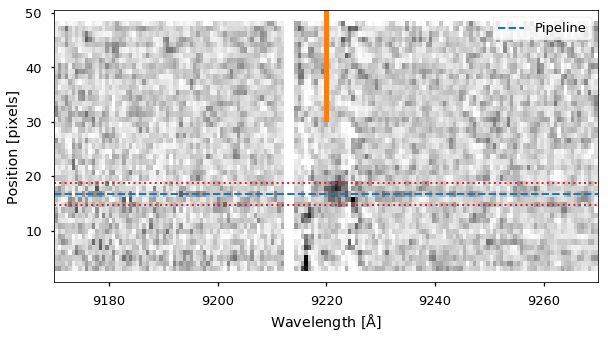

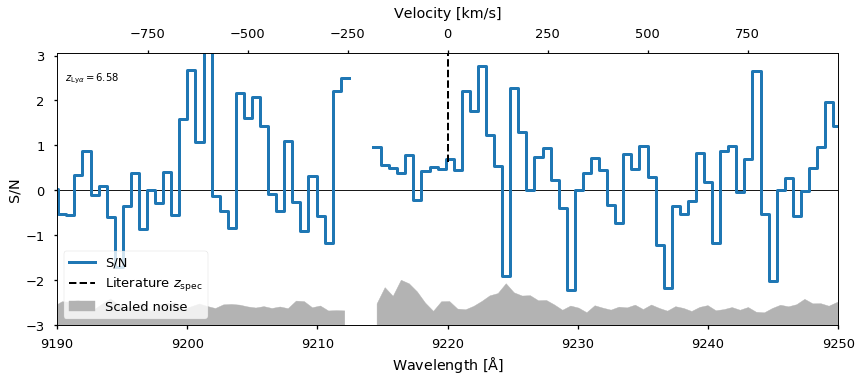

In [12]:
# Plot
obj_files_skysub = sorted(set(glob.glob(datadir+'obj_abs_slits_lin_fluxcalib.fits')))

bino_plot_fluxcalib = bt.BinoPlotter(obj_files_skysub[-1], 
                                     transmission=transmission['transmission'])

# Line to center on
Lya_wave   = 9220. # Wavelength to center on
posy_width = 1.*4. # Pixel width of extraction window for 1D spectrum (4 pix = PSF from stars ~1")
wave_limA  = 30.   # Wavelength range to plot over (Lya_wave /pm wave_limA)

targetid = 50      # slit number ( mask id + 1)

image, ypos = bino_plot_fluxcalib.spec2D(target=targetid, wave_lineA=Lya_wave, posy_width=posy_width,
                               vmin_sig=-0.3, vmax_sig=0.7, wave_limA=50., posy=None,
                               smooth=None, find_peaks=False)

bino_plot_fluxcalib.spec1D(image, wave_lineA=Lya_wave, fit=False,
                 posy_med=ypos, posy_width=posy_width, wave_limA=wave_limA,
                 StoN=True, flux_unit='erg cm$^{-2}$ s$^{-1}$ $\mathrm{\AA}^{-1}$')